In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
import random

In [2]:
df = pd.read_csv('../data/raw/crimedata_csv_all_years.csv')
df = df.query('YEAR <=2020')

In [3]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

In [12]:
train_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
571722,Theft from Vehicle,2004,6,27,22,15,30XX BIRCH ST,Fairview,490261.0071,5.456233e+06
386034,Other Theft,2016,7,11,12,18,44XX OAK ST,South Cambie,490713.7147,5.454766e+06
152517,Mischief,2003,3,19,0,53,29XX RUPERT ST,Renfrew-Collingwood,497550.7640,5.456132e+06
697428,Theft from Vehicle,2020,2,13,18,45,NELSON ST / SEYMOUR ST,Central Business District,491125.6602,5.458434e+06
534239,Theft from Vehicle,2003,1,26,23,0,1XX KEEFER PL,Central Business District,492122.6441,5.458572e+06


In [13]:
train_df.groupby('HOUR').count().head()

,TYPE,YEAR,MONTH,DAY,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
HOUR,,,,,,,,,
0,29788,29788,29788,29788,29788,29788,29778,29788,29788
1,17735,17735,17735,17735,17735,17735,17732,17734,17734
2,14600,14600,14600,14600,14600,14600,14596,14599,14599
3,12677,12677,12677,12677,12677,12677,12673,12674,12674
4,11576,11576,11576,11576,11576,11575,11576,11576,11576


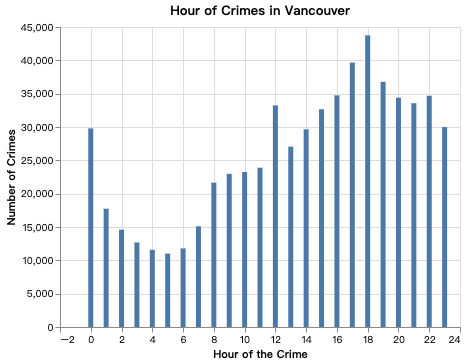

In [14]:
alt.Chart(train_df, title="Hour of Crimes in Vancouver").mark_bar(clip=True).encode(
    x=alt.X(
        "HOUR",
        title="Hour of the Crime",
        scale=alt.Scale(domain=(0, 23)),
        axis=alt.Axis(format="d")
        ,
    ),
    y=alt.Y("count()", title="Number of Crimes"),
)

In [8]:
rebase_zero_hour_count = len(train_df.query("HOUR == 0")) - int(len(train_df["HOUR"]!=0)/23)
rebase_zero_hour_index = train_df[train_df["HOUR"]==0].sample(rebase_zero_hour_count).index
rebase_zero_hour_count

59756

In [9]:
train_df.loc[rebase_zero_hour_index, 'HOUR'] = np.random.randint(0, 24, rebase_zero_hour_count)

In [10]:
train_df.groupby('HOUR').count().head()

,TYPE,YEAR,MONTH,DAY,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
HOUR,,,,,,,,,
0,29788,29788,29788,29788,29788,29788,29778,29788,29788
1,17735,17735,17735,17735,17735,17735,17732,17734,17734
2,14600,14600,14600,14600,14600,14600,14596,14599,14599
3,12677,12677,12677,12677,12677,12677,12673,12674,12674
4,11576,11576,11576,11576,11576,11575,11576,11576,11576


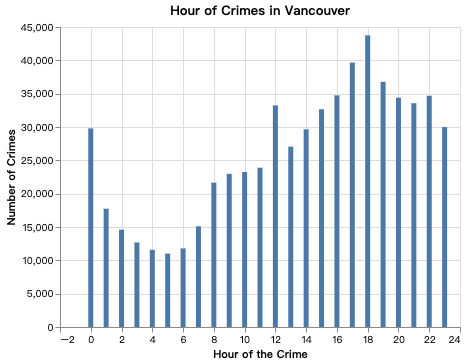

In [11]:
alt.Chart(train_df, title="Hour of Crimes in Vancouver").mark_bar(clip=True).encode(
    x=alt.X(
        "HOUR",
        title="Hour of the Crime",
        scale=alt.Scale(domain=(0, 23)),
        axis=alt.Axis(format="d")
        ,
    ),
    y=alt.Y("count()", title="Number of Crimes"),
)

In [ ]:
df.to_csv('../data/processed/crimedata_processed.csv')